<a href="https://colab.research.google.com/github/nerobite/neural_networks/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

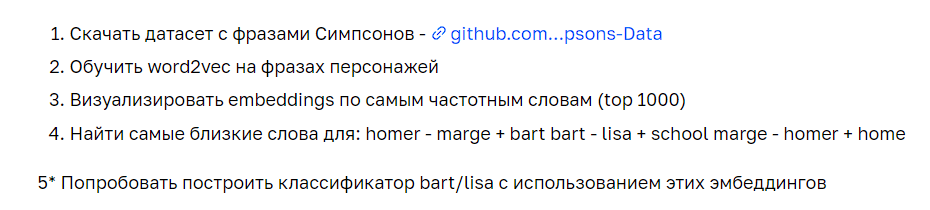

In [16]:
from gensim.models import Word2Vec
import pandas as pd

# Загрузка данных
data = pd.read_csv('/content/simpsons.csv', on_bad_lines='skip')

data.head()

<ipython-input-16-b4d4b6d8e942>:5: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/simpsons.csv', on_bad_lines='skip')


,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3.0
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22.0
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5.0
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40.0,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33.0


In [17]:
# Предобработка текста
data['spoken_words'] = data['spoken_words'].str.lower()
data['spoken_words'][0]

"no, actually, it was a little of both. sometimes when a disease is in all the magazines and all the news shows, it's only natural that you think you have it."

In [18]:
data['spoken_words'].dropna(inplace=True)

In [19]:
data['spoken_words'] = data['spoken_words'].str.replace('[^\w\s]', '')

In [20]:
data['spoken_words'][0]

"no, actually, it was a little of both. sometimes when a disease is in all the magazines and all the news shows, it's only natural that you think you have it."

In [21]:
data['spoken_words'] = data['spoken_words'].str.split()

In [22]:
data['spoken_words'][0]

['no,',
 'actually,',
 'it',
 'was',
 'a',
 'little',
 'of',
 'both.',
 'sometimes',
 'when',
 'a',
 'disease',
 'is',
 'in',
 'all',
 'the',
 'magazines',
 'and',
 'all',
 'the',
 'news',
 'shows,',
 "it's",
 'only',
 'natural',
 'that',
 'you',
 'think',
 'you',
 'have',
 'it.']

In [23]:
data['spoken_words'] = data['spoken_words'].fillna('')

In [24]:
data['spoken_words'][0]

['no,',
 'actually,',
 'it',
 'was',
 'a',
 'little',
 'of',
 'both.',
 'sometimes',
 'when',
 'a',
 'disease',
 'is',
 'in',
 'all',
 'the',
 'magazines',
 'and',
 'all',
 'the',
 'news',
 'shows,',
 "it's",
 'only',
 'natural',
 'that',
 'you',
 'think',
 'you',
 'have',
 'it.']

In [25]:
sentences = [row for row in data['spoken_words']]

In [26]:
# Обучение модели Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

# Сохранение модели
model.save("simpsons_word2vec.model")

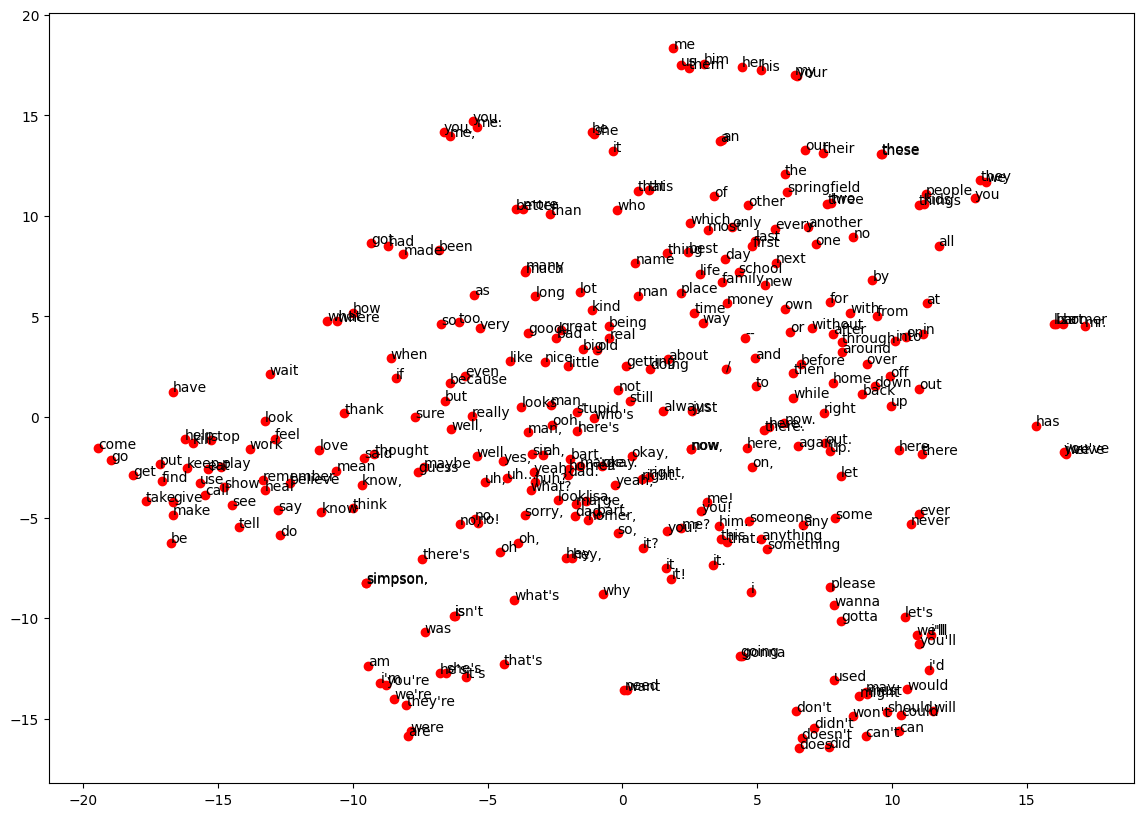

In [31]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Получение векторов для самых частотных слов
vocab = list(model.wv.index_to_key)[:300]
X = model.wv[vocab]

# Применение TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Визуализация
plt.figure(figsize=(14, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='red')
for i, word in enumerate(vocab):
    plt.annotate(word, xy=(X_tsne[i, 0], X_tsne[i, 1]))
plt.show()


<ipython-input-42-accfa689459d>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')


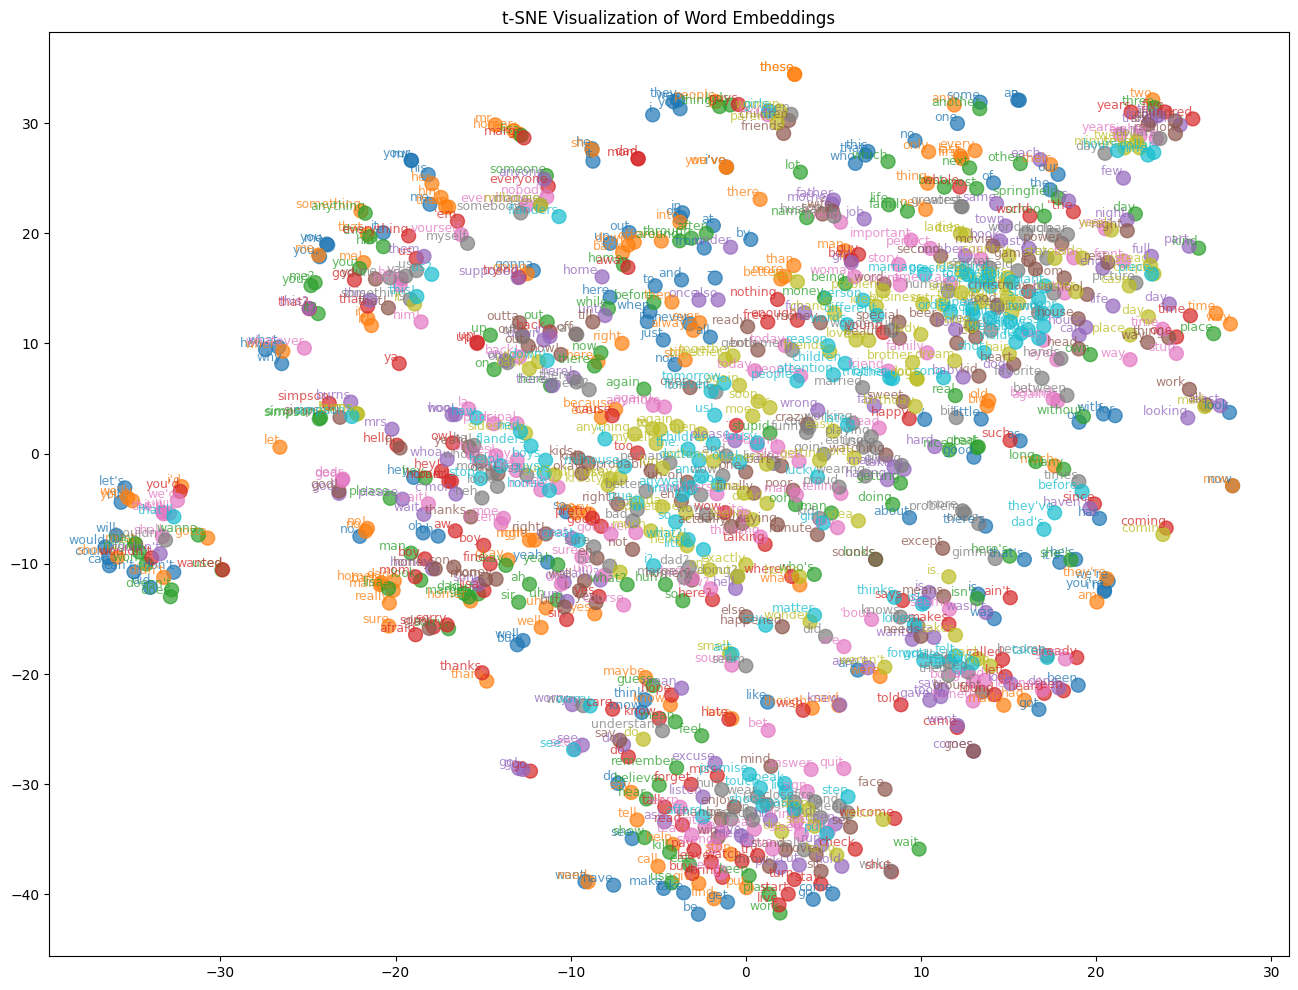

In [42]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

# Получение векторов для самых частотных слов
vocab = list(model.wv.index_to_key)[:1000]
X = model.wv[vocab]

# Применение TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Визуализация с улучшениями
plt.figure(figsize=(16, 12))
colors = np.linspace(0, 1, len(vocab))
cmap = get_cmap('tab10')

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, cmap=cmap, alpha=0.7, s=100)

for i, word in enumerate(vocab):
    plt.annotate(word, xy=(X_tsne[i, 0], X_tsne[i, 1]), fontsize=9, alpha=0.75,
                 color=cmap(colors[i]), ha='right', va='bottom')

plt.title('t-SNE Visualization of Word Embeddings')
plt.show()


In [32]:
def find_closest_words(model, positive, negative):
    return model.wv.most_similar(positive=positive, negative=negative, topn=5)

print(find_closest_words(model, ['homer', 'bart'], ['marge']))
print(find_closest_words(model, ['bart', 'school'], ['lisa']))
print(find_closest_words(model, ['marge', 'home'], ['homer']))


[('lisa', 0.8662309050559998), ('mr.', 0.769167959690094), ('mrs.', 0.6739718914031982), ('maggie', 0.6183627247810364), ('simpson', 0.6108645796775818)]
[('night', 0.8271878957748413), ('school.', 0.822814404964447), ('room', 0.8088884353637695), ('plant.', 0.8054588437080383), ('house', 0.8018783330917358)]
[('back', 0.8609833121299744), ('down', 0.7981702089309692), ('home.', 0.787764310836792), ('house', 0.7822599411010742), ('bed', 0.7735956907272339)]


In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd

class SimpsonsDataset(Dataset):
    def __init__(self, data, model):
        self.data = data
        self.model = model
        # Преобразование всех значений в строки и обработка NaN
        self.data['character_id'] = self.data['character_id'].fillna('').astype(str)
        self.data['spoken_words'] = self.data['spoken_words'].fillna('').astype(str)
        self.labels = [1 if '8.0' in id else 0 for id in self.data['character_id']]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sentence = self.data.iloc[idx]['spoken_words'].split()
        vectors = [self.model.wv[word] for word in sentence if word in self.model.wv]
        if not vectors:
            vectors = [np.zeros(self.model.vector_size)]
        vector = np.mean(vectors, axis=0)
        label = self.labels[idx]
        return torch.tensor(vector, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

# Создание датасета и загрузчика данных
dataset = SimpsonsDataset(data, model)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Создание модели
class SimpleClassifier(nn.Module):
    def __init__(self, input_dim):
        super(SimpleClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, 2)

    def forward(self, x):
        return self.fc(x)

# Инициализация модели, потерь и оптимизатора
classifier = SimpleClassifier(model.vector_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)

In [41]:
from sklearn.metrics import accuracy_score

In [39]:
# # Обучение модели
for epoch in range(10):
    classifier.train()
    epoch_loss = 0.0
    all_labels = []
    all_predictions = []
    for inputs, labels in dataloader:
      optimizer.zero_grad()
      outputs = classifier(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      epoch_loss += loss.item()

    _, predictions = torch.max(outputs, 1)
    all_labels.extend(labels.cpu().numpy())
    all_predictions.extend(predictions.cpu().numpy())
    # Расчет метрик с использованием параметра zero_division
    accuracy = accuracy_score(all_labels, all_predictions)
    print(f"Epoch {epoch + 1}, Loss: {epoch_loss/len(dataloader):.4f}")
    print(f"Accuracy: {accuracy:.4f}")


Epoch 1, Loss: 0.3418
Accuracy: 0.8750
Epoch 2, Loss: 0.3419
Accuracy: 0.7500
Epoch 3, Loss: 0.3418
Accuracy: 0.8750
Epoch 4, Loss: 0.3418
Accuracy: 0.8750
Epoch 5, Loss: 0.3419
Accuracy: 0.7500
Epoch 6, Loss: 0.3419
Accuracy: 0.6250
Epoch 7, Loss: 0.3418
Accuracy: 1.0000
Epoch 8, Loss: 0.3418
Accuracy: 1.0000
Epoch 9, Loss: 0.3418
Accuracy: 1.0000
Epoch 10, Loss: 0.3418
Accuracy: 0.8750
